### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading data

In [4]:
!unzip MNIST_data.zip

Archive:  MNIST_data.zip
  inflating: test.csv                
  inflating: train.csv               


In [5]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv("test.csv")

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [7]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [8]:
data.sample(n=10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
839,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22295,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22787,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6061,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33332,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23153,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40439,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5416,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data visualization

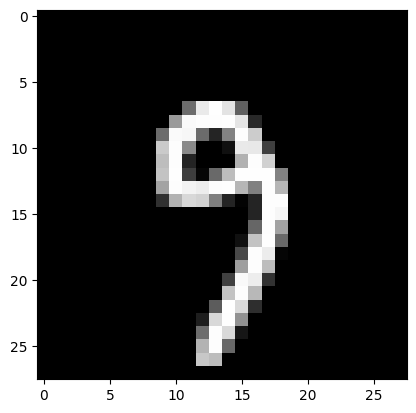

In [9]:
img = data_x.iloc[41962].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [10]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [12]:
data_x.shape

(42000, 784)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335114 (1.28 MB)
Trainable params: 335114 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model training

In [22]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
591/591 [==============================] - 2s 3ms/step - loss: 1.7285 - accuracy: 0.8687 - val_loss: 0.4743 - val_accuracy: 0.9093
Epoch 2/10
591/591 [==============================] - 1s 2ms/step - loss: 0.2742 - accuracy: 0.9364 - val_loss: 0.2792 - val_accuracy: 0.9295
Epoch 3/10
591/591 [==============================] - 1s 3ms/step - loss: 0.1741 - accuracy: 0.9554 - val_loss: 0.2400 - val_accuracy: 0.9457
Epoch 4/10
591/591 [==============================] - 1s 2ms/step - loss: 0.1582 - accuracy: 0.9585 - val_loss: 0.2809 - val_accuracy: 0.9352
Epoch 5/10
591/591 [==============================] - 2s 3ms/step - loss: 0.1355 - accuracy: 0.9637 - val_loss: 0.2394 - val_accuracy: 0.9448
Epoch 6/10
591/591 [==============================] - 2s 3ms/step - loss: 0.1173 - accuracy: 0.9670 - val_loss: 0.1869 - val_accuracy: 0.9590
Epoch 7/10
591/591 [==============================] - 1s 2ms/step - loss: 0.1036 - accuracy: 0.9723 - val_loss: 0.1856 - val_accuracy: 0.9512
Epoch 

### Model evaluation

In [23]:
model.predict(X_test).argmax(axis=1)

875/875 [==============================] - 1s 848us/step


array([2, 0, 9, ..., 3, 9, 2])

875/875 [==============================] - 1s 778us/step
The predicted label is: 0


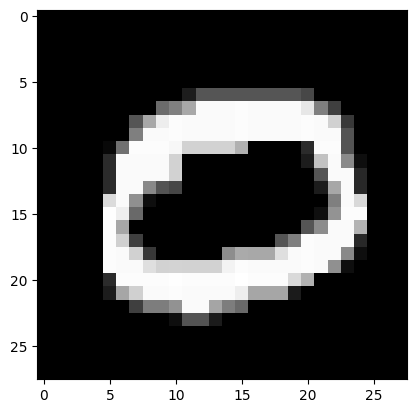

In [24]:
img = X_test.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])